## Tasya Amanda Adinegara

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.api.types import is_numeric_dtype, is_float_dtype
from scipy import stats
from scipy.stats import skew, ttest_ind
import matplotlib.pyplot as plt

In [2]:
sns.set(color_codes=True)

## Load Dataset

df = pd.read_csv("data/insurance.csv")
df.head()

## A. The Shape of Data 

In [4]:
df.shape

(1338, 7)

## B. The Data Type of Each Attribute 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The Numeric Columns are :
- Age
- BMI
- Children
- Changes

The Categorical Columns are:
- Sex
- Smoker
- Region

## Checking the Presence of Missing Values

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no Missing Values in the data

## 5 Poin Summary of Numerical Attributes

I made two ways of doing this problem.

## Step 1:  

In [7]:
for y in df.columns:
    if ((is_numeric_dtype(df[y]) == True) | is_float_dtype(df[y] == True)):
        print(df[y].describe())

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


## Step 2 :

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Distribution Age Column

Skewness distribution of age column : 0.05567251565299186


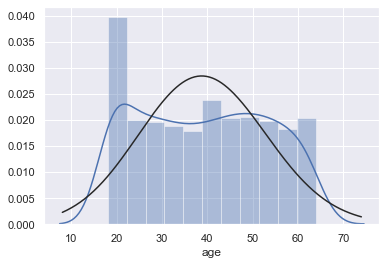

In [9]:
print("Skewness distribution of age column : {}".format(df.age.skew()))
sns.distplot(df['age'], fit=stats.gamma);

# Distribution BMI Column

Skewness distribution of bmi column : 0.2840471105987448


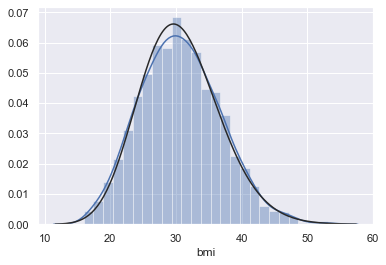

In [10]:
print("Skewness distribution of bmi column : {}".format(df.bmi.skew()))
sns.distplot(df['bmi'], fit=stats.gamma);

# Distribution Charges Column

Skewness distribution of charges column : 1.5158796580240388


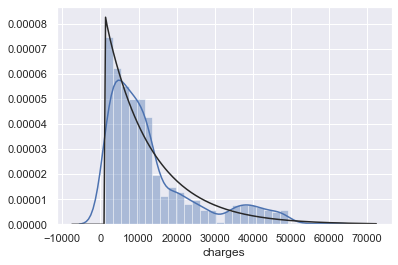

In [11]:
print("Skewness distribution of charges column : {}".format(df.charges.skew()))
sns.distplot(df['charges'], fit=stats.gamma);

# The measure of skewness of BMI Column

skewness = 0 : normally distributed.
skewness > 0 : more weight in the left tail of the distribution.
skewness < 0 : more weight in the right tail of the distribution. 

In [12]:
from pandas import DataFrame
data = DataFrame(df,columns=['bmi', 'age', 'charges'])
n_skew = skew(data)    
for i in range(len(n_skew)):
    if i == 0 : 
        print("The skew of", data.columns[i], "column :", n_skew[i], 'normally distributed')
    elif i > 0 : 
        print("The skew of", data.columns[i], "column :", n_skew[i], 'more weight in the left tail of the distribution')
    elif i < 0: 
        print("The skew of", data.columns[i], "column :", n_skew[i], 'more weight in the right tail of the distribution')

The skew of bmi column : 0.2837285729170938 normally distributed
The skew of age column : 0.055610083072598564 more weight in the left tail of the distribution
The skew of charges column : 1.5141797118745757 more weight in the left tail of the distribution


## Checking the presence of outliers in 'bmi', 'age' and 'charges' columns

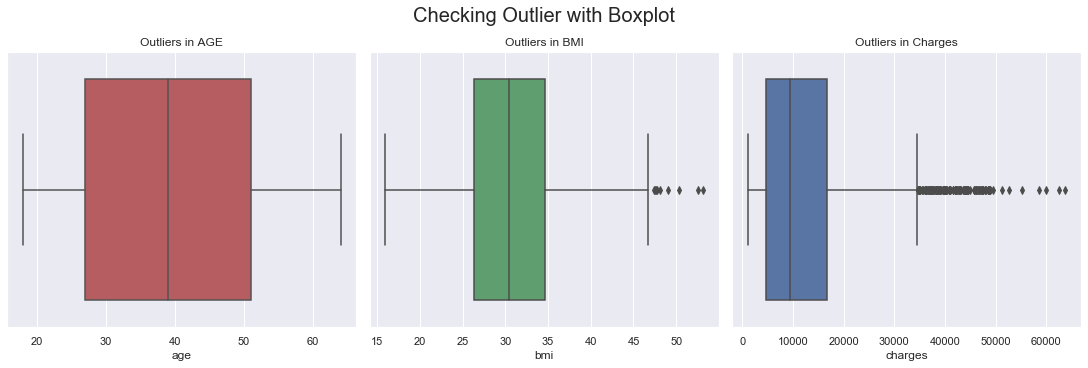

In [42]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5), constrained_layout = True)
sns.boxplot(x=data['age'], color = 'r', ax = ax[0])
sns.boxplot(x=data['bmi'], color = 'g', ax = ax[1])
sns.boxplot(x=data['charges'], color = 'b', ax = ax[2])
ax[0].set_title('Outliers in AGE')
ax[1].set_title('Outliers in BMI')
ax[2].set_title('Outliers in Charges')
fig.suptitle('Checking Outlier with Boxplot', fontsize = 20);

In [47]:
def outliers(data2):
    Q1_charges = data2.quantile(0.25)
    Q3_charges = data2.quantile(0.75)
    IQR = Q3_charges - Q1_charges
    lower = Q1_charges - 1.5 * IQR
    upper = Q3_charges + 1.5 * IQR
    charges_outlier = len(data.loc[data2 < lower] | data.loc[data2 > upper])
    print(charges_outlier)

In [80]:
data1 = DataFrame(df,columns=['bmi', 'age', 'charges'])
for i in range(len(data1.columns)):
    print("The outlier in column", data1.columns[i], "is :")  
    outliers(data[data1.columns[i]])

The outlier in column bmi is :
9
The outlier in column age is :
0
The outlier in column charges is :
139


## No 2. Do Charges of People Who Smoke Differ Significantly from the People who dont? (Hypothesis Testing)

## 1. Separate the data

In [82]:
smoker = df[df['smoker'] == 'yes']

In [83]:
smoker.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [24]:
non_smoker = df[df['smoker'] == 'no']

In [84]:
non_smoker.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


## TT-Test(Smoker, Non Smoker Data)

ttest_ind. scipy.stats.ttest_ind(a, b, axis=0, equal_var=True)[source] Calculates the T-test for the means of TWO INDEPENDENT samples of scores. This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values.

In [85]:
value = ttest_ind(smoker['charges'], non_smoker['charges'], equal_var = True)
print(value)

Ttest_indResult(statistic=46.664921172723716, pvalue=8.271435842177219e-283)


In [94]:
if value[1] > 0.05 : 
    print('Probably the same distribution', '\nH0 is accepted','\nBoth of data have same average')
else : 
    print('Probably different distribution', '\nH0 is rejected & H1 is accepted', '\nBoth of data have not same average')

Probably different distribution 
H0 is rejected & H1 is accepted 
Both of data have not same average


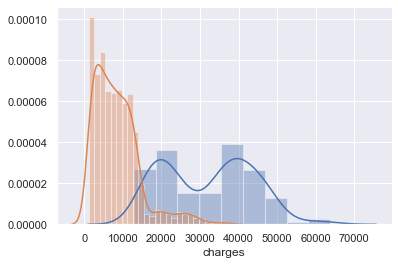

In [36]:
sns.distplot(smoker['charges']);
sns.distplot(non_smoker['charges']);